<a href="https://colab.research.google.com/github/Sowmya-Sow/Customer_Churn_Analysis_Repo/blob/main/CUSTOMER_CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer_churn.csv to customer_churn.csv


In [ ]:
import pandas as pd
df = pd.read_csv("customer_churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})


/tmp/ipython-input-4057985727.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


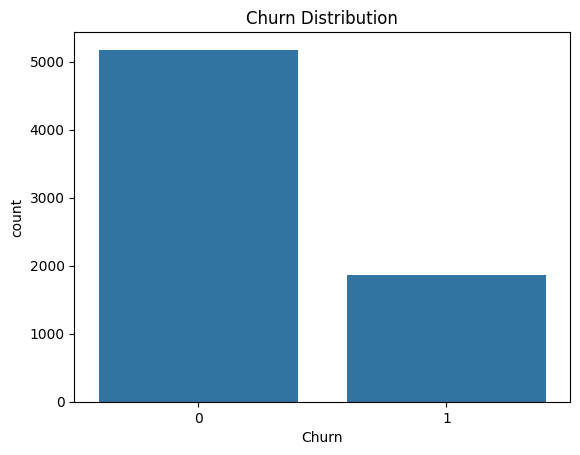

In [ ]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.savefig("churn_distribution.png")
plt.show()


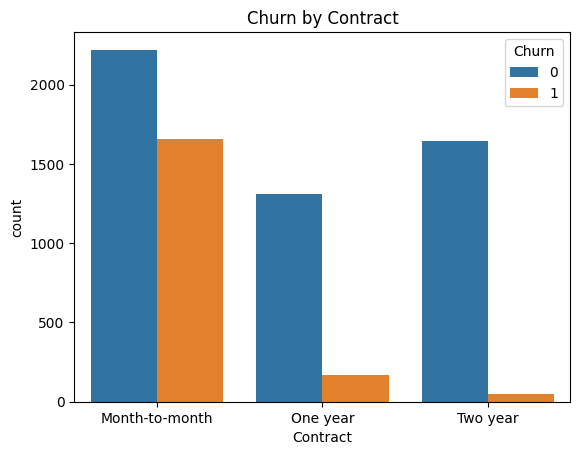

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract")
plt.savefig("churn_by_contract.png")
plt.show()

In [ ]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 72],
    labels=['0-1 year','1-2 years','2+ years']
)

df_model = pd.get_dummies(df, drop_first=True)
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



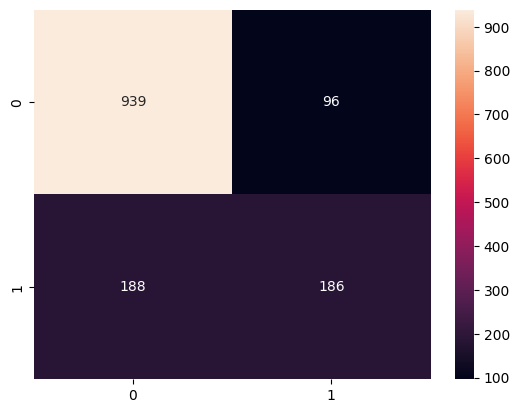

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.show()


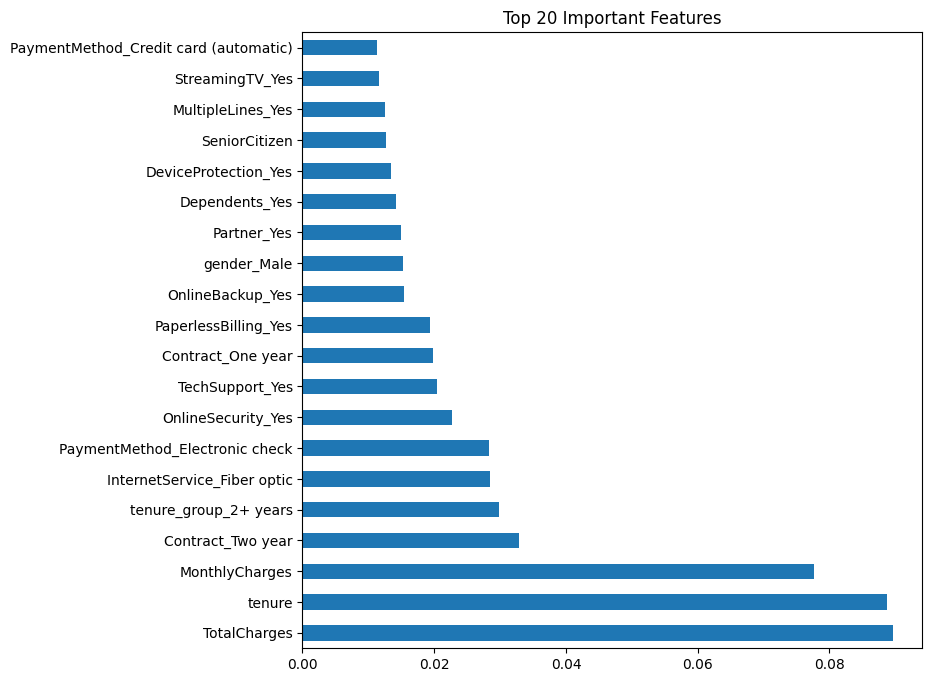

In [ ]:
importances = model.feature_importances_
features = X.columns

fi = pd.Series(importances, index=features).sort_values(ascending=False)[:20]

fi.plot(kind='barh', figsize=(8,8))
plt.title("Top 20 Important Features")
plt.savefig("feature_importance")
plt.show()


In [ ]:
import os
os.makedirs("data/processed", exist_ok=True)

In [ ]:
df['churn_probability'] = model.predict_proba(X)[:,1]
df.to_csv("data/processed/churn_predictions.csv", index=False)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from google.colab import files
files.download("data/processed/churn_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>